In [2]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns
import ensemblepy as ep
from ensemblepy.stats import _incoherence, _cohesion
import matplotlib.pyplot as plt

In [3]:
SAMPLE = 40
MAX = 20
COUNT = 10

In [4]:
def gens(n=2):
    # position, spread, count
    return [[np.random.uniform(0,MAX),
            max(np.random.normal(1,0.5), 0.1),
            np.random.randint(1,COUNT)]
            for _ in range(n)]

def letter(gg=None):
    if gg is None: gg = gens()
    return np.concatenate([np.random.normal(*g) for g in gg])

In [5]:
def generate(gg=None):
    data = []
    ensembles = []
    for i in range(SAMPLE):
        ensemble = []
        d = {'time': i }
        if gg is None:
            d['pick'] = i
            letr = letter()
        else:
            p = np.random.choice(range(len(gg)))
            d['pick'] = p
            letr = letter(gg[p])
        for j, point in enumerate(letr):
            d[j] = point
            ensemble.append(point)
        data.append(d)
        ensembles.append(ensemble)
    return pd.DataFrame(data).melt(id_vars=['time', 'pick']), ensembles

In [6]:
def plot(df, es, title=None, ax=None, pal=False):
    c = ep.Continuous(es)
    if pal:
        g = sns.scatterplot(data=df, x='time', y='value', hue='pick', palette=pal, ax=ax, legend=False)
    else:
        g = sns.scatterplot(data=df, x='time', y='value', color='black', ax=ax, legend=False)
    
    if title:
        title = title+(", C=%.1f" % c.cohesion)
    else:
        std = np.std(np.concatenate(es))
        mean = np.std([np.mean(e) for e in es])
        stdstd = np.std([np.std(e) for e in es])
        title = "σ=%.1f, σ(μ)=%.1f, σ(σ)=%.1f" % (std, mean, stdstd)
        
    g.set(title=title, xlabel='Time (s)', ylabel='Frequency (Hz)')


In [7]:
import matplotlib.pyplot as plt

In [8]:
SUPER = 2
SEMI = 5
alphabets = {}

np.random.seed(44)
two = [gens() for _ in range(SUPER)]
alphabets['SUPER'] = generate(two)

# match means
two[1][0][0] = two[0][0][0]
#two[1][1][0] = 0
alphabets['MATCH'] = generate(two)

np.random.seed(52)
alphabets['SEMI'] = generate([gens() for _ in range(SEMI)])

np.random.seed(32)
alphabets['RAND'] = generate()

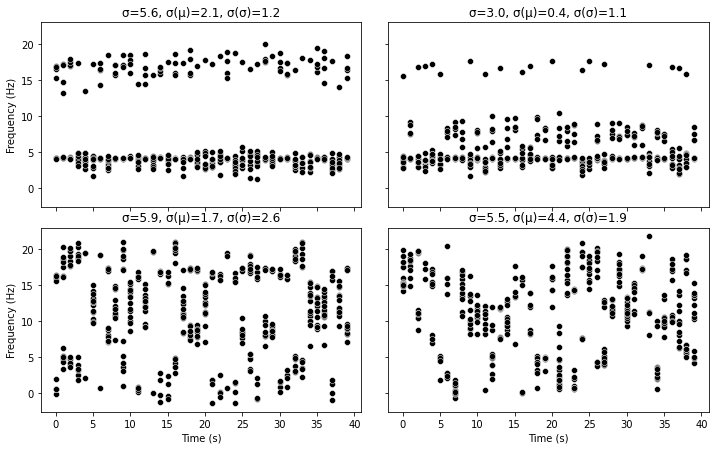

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,6))
plt.tight_layout()

plot(*alphabets['MATCH'], None, axes[0][0])
plot(*alphabets['SUPER'], None, axes[0][1])
plot(*alphabets['SEMI'], None, axes[1][0])
plot(*alphabets['RAND'], None, axes[1][1])

fig.savefig('burstv2.eps')

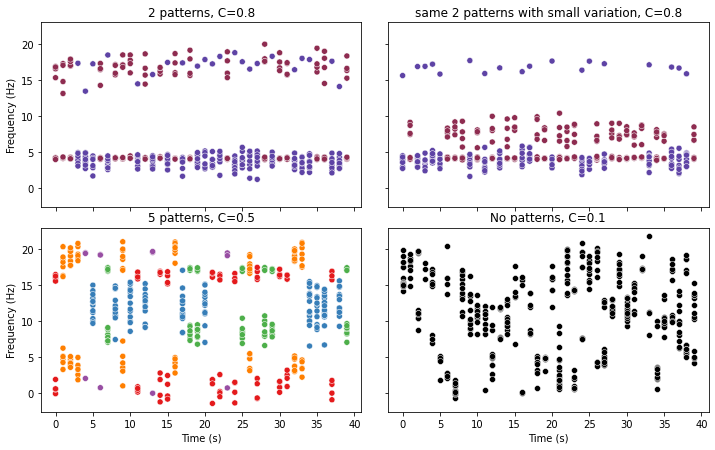

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,6))
plt.tight_layout()

plot(*alphabets['SUPER'], 'same %s patterns with small variation' % SUPER, axes[0][1], 'twilight')
plot(*alphabets['MATCH'], '%s patterns' % SUPER, axes[0][0], 'twilight')
plot(*alphabets['SEMI'], '%s patterns' % SEMI, axes[1][0], 'Set1')
plot(*alphabets['RAND'], 'No patterns', axes[1][1])

fig.savefig('starburstv2.eps')

In [18]:
cohesions = []
top = 0
diff = 0
for i in range(30,100):
    np.random.seed(i)
    sup = ep.Continuous(generate([gens() for _ in range(SUPER)])[1])
    
    np.random.seed(i)
    dis = ep.Continuous(generate()[1])
    
    np.random.seed(i)
    sem = ep.Continuous(generate([gens() for _ in range(SEMI)])[1])
    
    print(i, sup.cohesion, sem.cohesion, dis.cohesion)

30 0.5494798934340265 0.22982003398010606 0.24632673627114102
31 0.6292749459368783 0.41594239965468727 0.2166200808536364
32 0.7222724440662551 0.3035725898875847 0.1414438632733765
33 0.7522208404324899 0.34287928198865597 0.19652942516104854
34 0.6188327415443703 0.28600452289428885 0.19604772765168896
35 0.5704874830273832 0.46149788167543987 0.21745009653698064
36 0.7242555315582145 0.47495012989423335 0.1935109208410896
37 0.7187095173682324 0.572399043496362 0.14872848807521485
38 0.4845530160867113 0.1663323426926495 0.21328433381711842
39 0.7079770427846017 0.355010426127019 0.17317930778249
40 0.7278799600037862 0.2767248264272806 0.2975760247529147
41 0.633856155011946 0.24825189638267092 0.1666624866988382
42 0.7349312214262167 0.3094619194102467 0.17943664840131143
43 0.45811589211019327 0.22660098273721896 0.18536596671650937
44 0.7970945007908878 0.24846834452174063 0.25912969597939217
45 0.7662708869302938 0.24852868123964297 0.15151521180844596
46 0.6700740390183088 0.

KeyboardInterrupt: 